In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
from datetime import datetime
from pytz import timezone
import pytz

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import median_absolute_error, mean_poisson_deviance, mean_gamma_deviance
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_2018 = pd.read_csv('dallas_solar_energy_2018.csv',parse_dates=[0], index_col=0)
df_2019 = pd.read_csv('dallas_solar_energy_2019.csv',parse_dates=[0], index_col=0)
df_2020 = pd.read_csv('dallas_solar_energy_2020.csv',parse_dates=[0], index_col=0)
weather = df_2018.append(df_2019, ignore_index=True)

In [3]:
weather.loc[weather.index == '2018-01-01 00:00:00', :]

,air_temperature,alpha,aod,asymmetry,cld_opd_dcomp,cld_reff_dcomp,clearsky_dhi,clearsky_dni,clearsky_ghi,cloud_press_acha,...,ghi,ozone,relative_humidity,solar_zenith_angle,ssa,surface_albedo,surface_pressure,total_precipitable_water,wind_direction,wind_speed


In [4]:
X=weather.iloc[:,~weather.columns.isin(['ghi'])]  
y=weather.iloc[:,15]  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
models=[("Linear Regression", LinearRegression()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("Extra Trees", ExtraTreesRegressor()),
        ("Gradient Boosting", GradientBoostingRegressor()),
        ("KNeighbors", KNeighborsRegressor())]

all_data=[]
scoring = {'r2': 'r2',
           'root_mean_squared_error': 'neg_root_mean_squared_error',
           'mean_absolute_error': 'neg_mean_absolute_error',
           'mean_squared_error': 'neg_mean_squared_error', 
           'max_error': 'max_error'}

for name, model in models:
    results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    all_data.append({'model':name, 'score':results})
    print(f"\x1b[96m{name}\x1b[0m: \x1b[93m{results['test_r2'].mean():.6f}\x1b[0m ± {results['test_r2'].std():.4f}")

Linear Regression: 0.974648 ± 0.0014
Decision Tree: 0.998583 ± 0.0002
Random Forest: 0.999460 ± 0.0001
Extra Trees: 0.999746 ± 0.0000
Gradient Boosting: 0.999135 ± 0.0001
KNeighbors: 0.997670 ± 0.0001


In [6]:
performance = {'model':[], 'rmse':[], 'mse':[], 'r2':[], 'mae':[], 'me':[]}

for d in all_data:   
    performance['model'].append(d['model'])
    performance['r2'].append(np.abs(d['score']['test_r2'].mean())*100)
    performance['mse'].append(np.abs(d['score']['test_mean_squared_error'].mean()))
    performance['rmse'].append(np.abs(d['score']['test_root_mean_squared_error'].mean()))
    performance['mae'].append(np.abs(d['score']['test_mean_absolute_error'].mean()))
    performance['me'].append(np.abs(d['score']['test_max_error'].mean()))
    
print(performance)

{'model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'Gradient Boosting', 'KNeighbors'], 'rmse': [38.43176432672014, 9.076063207506666, 5.599336926545452, 3.841496012949108, 7.087920089624272, 11.652365415384192], 'mse': [1477.7386420927, 82.65743735186928, 31.507607873098568, 14.824551837448212, 50.39337833216763, 135.8620209119738], 'r2': [97.46479015204436, 99.8582747647507, 99.9459984873717, 99.97462113707188, 99.91352818839492, 99.76698620686983], 'mae': [24.595357145174585, 3.2096060848805257, 1.9158216087511701, 1.275942189894361, 3.5654046904570804, 5.883650785814873], 'me': [200.92922680082629, 104.3, 94.368, 69.96199999999999, 69.90619831786319, 104.22]}


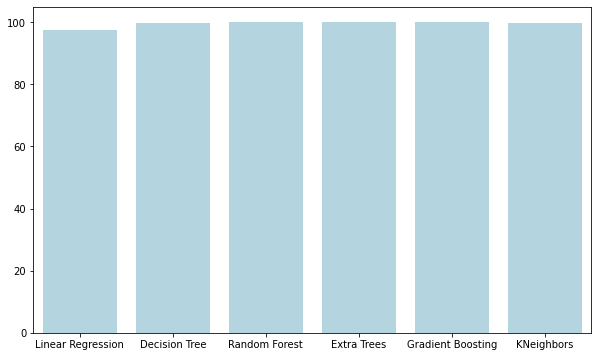

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='r2', data=performance, color="lightblue");

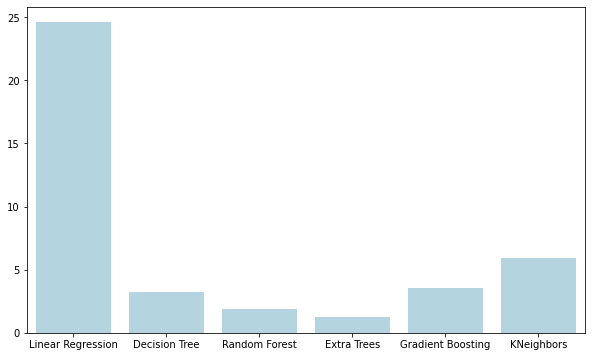

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='mae', data=performance, color="lightblue");       

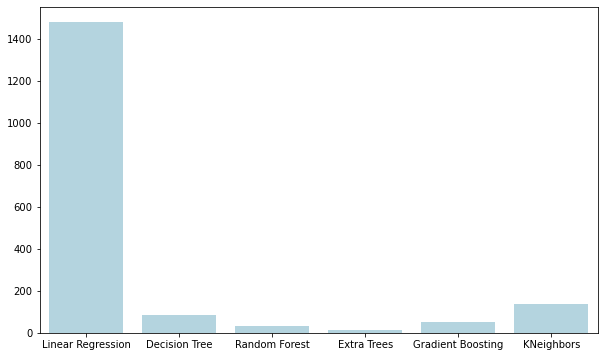

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='mse', data=performance, color="lightblue");

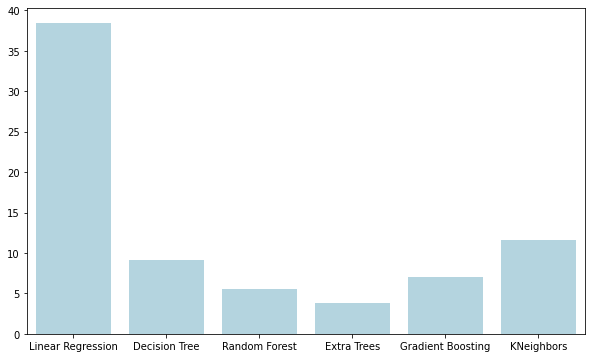

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='rmse', data=performance, color="lightblue");  